In [21]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport

In [26]:
%matplotlib inline

# Carregando os dados

In [2]:
df = pd.read_csv('../input/renner_desafio_pucrs_treino.csv')
df.head()

,item,cod_loja,semana_comercial,data_semana_comercial,venda,categoria_loja,localidade,loja_tamanho,clima
0,100342,58,202130,2021-07-25,51,fisica,br,G,RIO
1,100342,63,202221,2022-05-22,86,fisica,br,G,RIO
2,100342,84,202131,2021-08-01,62,fisica,br,G,RIO
3,100342,2,202222,2022-05-29,171,fisica,br,G,SUL
4,100342,407,202223,2022-06-05,188,web,br,GG,W


# Explorando os dados

# Porcentagem de vendas por localidade

ValueError: Wedge sizes 'x' must be non negative values

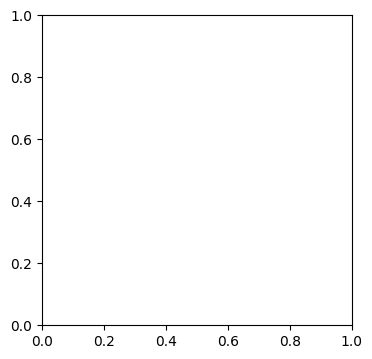

In [41]:

#TRATAR DADOS NEGATIVOS PARA PODER PLOTAR O GRÁFICO

loc_percent = pd.DataFrame(df.groupby(["localidade"])["venda"].sum().reset_index())
colors = ['palevioletred', 'mediumpurple', 'mediumseagreen']

fig, ax = plt.subplots(figsize=(4,5))
ax.pie(df["venda"], labels=df["localidade"], autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 13})
ax.axis('equal')
plt.title("Sales Percentage across Category", fontsize=15)
plt.show()

# Total de vendas por clima

In [43]:
colors = ['palevioletred', 'mediumpurple', 'mediumseagreen']

plt.subplots(figsize=(10,5))
bar = plt.bar(df["clima"], df["venda"], width=0.75, color=colors)

sales = df["venda"].tolist()

i = 0
for c in bar:
    width = c.get_width()
    height = c.get_height()
    x, y = c.get_xy()
    i += 1

plt.title("Total de vendas entre os climas", fontsize=15)
plt.ylabel("Vendas", fontsize=13)
plt.xlabel("Clima", fontsize=13)
plt.show()

# VENDAS ENTRE OS CLIMAS PELA DATA

## Insights/anotações


*   Sem dados nulos ou faltantes;
*   Sem dados duplicados;
*   Colunas desnecessárias para o treinamento (dropar): Item, semana_comercial (recomendação do Hollisson);
*   Garantir que exista 1 linha por item, loja e data_semana_comercial (recomendação do Hollisson);
*   Possuimos somente duas lojas web, mas mesmo assim a quantidade de venda é muito maior do que a venda nas lojas físicas. Talvez, seja interessante separar modelos diferentes para cada tipo de loja;
*   Lojas web: cod 406 e 407 - todas tem: localidade = br, tamanho = gg, clima = w
*   Temos linhas com a quantidade de venda negativa (520 de 92877), fazer o tratamento;


In [ ]:
https://www.kaggle.com/code/josephnadar/m5-model-features

https://www.kaggle.com/code/josephnadar/walmart-forecast-eda
